In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

import warnings
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv(r'E:\learn st new\Credit score\loan_data_clean.csv', low_memory= False)
df.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_pct,loan_issue_m,cr_line_issue_m,earliest_cr_year
0,1077501,5000,36,10.650,162.870,B,10,RENT,24000.000,Verified,2011-12-01,0,credit_card,27.650,0.000,1985-01-01,1.000,0.000,3.000,0.000,13648,83.700,9.000,f,0.000,5831.780,5000.000,861.070,0.000,0.000,0.000,2015-01-01,171.620,2016-01-01,0.000,1,0.000,0.000,48.000,371.000,1985
1,1077430,2500,60,15.270,59.830,C,0,RENT,30000.000,Source Verified,2011-12-01,1,car,1.000,0.000,1999-04-01,5.000,0.000,3.000,0.000,1687,9.400,4.000,f,0.000,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,1,0.000,0.000,48.000,201.000,1999
2,1077175,2400,36,15.960,84.330,C,10,RENT,12252.000,Not Verified,2011-12-01,0,small_business,8.720,0.000,2001-11-01,2.000,0.000,2.000,0.000,2956,98.500,10.000,f,0.000,3003.650,2400.000,603.650,0.000,0.000,0.000,2014-06-01,649.910,2016-01-01,0.000,1,0.000,0.000,48.000,169.000,2001
3,1076863,10000,36,13.490,339.310,C,10,RENT,49200.000,Source Verified,2011-12-01,0,other,20.000,0.000,1996-02-01,1.000,35.000,10.000,0.000,5598,21.000,37.000,f,0.000,12226.300,10000.000,2209.330,16.970,0.000,0.000,2015-01-01,357.480,2015-01-01,0.000,1,0.000,0.000,48.000,238.000,1996
4,1075269,5000,36,7.900,156.460,A,3,RENT,36000.000,Source Verified,2011-12-01,0,wedding,11.200,0.000,2004-11-01,3.000,0.000,9.000,0.000,7963,28.300,12.000,f,0.000,5631.380,5000.000,631.380,0.000,0.000,0.000,2015-01-01,161.030,2015-09-01,0.000,1,0.000,0.000,48.000,133.000,2004


In [37]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(df, target='loan_status', bins=10)

Information value of id is 0.111688
Information value of loan_amnt is 0.004935
Information value of term is 0.029673
Information value of int_rate is 0.337049
Information value of installment is 0.008041
Information value of grade is 0.295393
Information value of emp_length is 0.003817
Information value of home_ownership is 0.015238
Information value of annual_inc is 0.049642
Information value of verification_status is 0.027892
Information value of issue_d is 0.122038
Information value of purpose is 0.032047
Information value of dti is 0.060088
Information value of delinq_2yrs is 0.000285
Information value of earliest_cr_line is 0.025447
Information value of inq_last_6mths is 0.117543
Information value of mths_since_last_delinq is 0.000183
Information value of open_acc is 0.000741
Information value of pub_rec is 0.000265
Information value of revol_bal is 0.0084
Information value of revol_util is 0.022554
Information value of total_acc is 0.002111
Information value of initial_list_statu

In [115]:
input = df.drop(columns = ['loan_status', 'id', 'policy_code'])
output = df['loan_status']

In [116]:
# Nhóm các biến định lượng
num_col = []
for x in input.dtypes.index:
    if input.dtypes[x] != 'object':
        num_col.append(x)

cat = ['id','term','emp_length','inq_last_6mths','policy_code']
num_col =  [x for x in num_col if x not in cat]
num_col

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'delinq_pct',
 'loan_issue_m',
 'cr_line_issue_m',
 'earliest_cr_year']

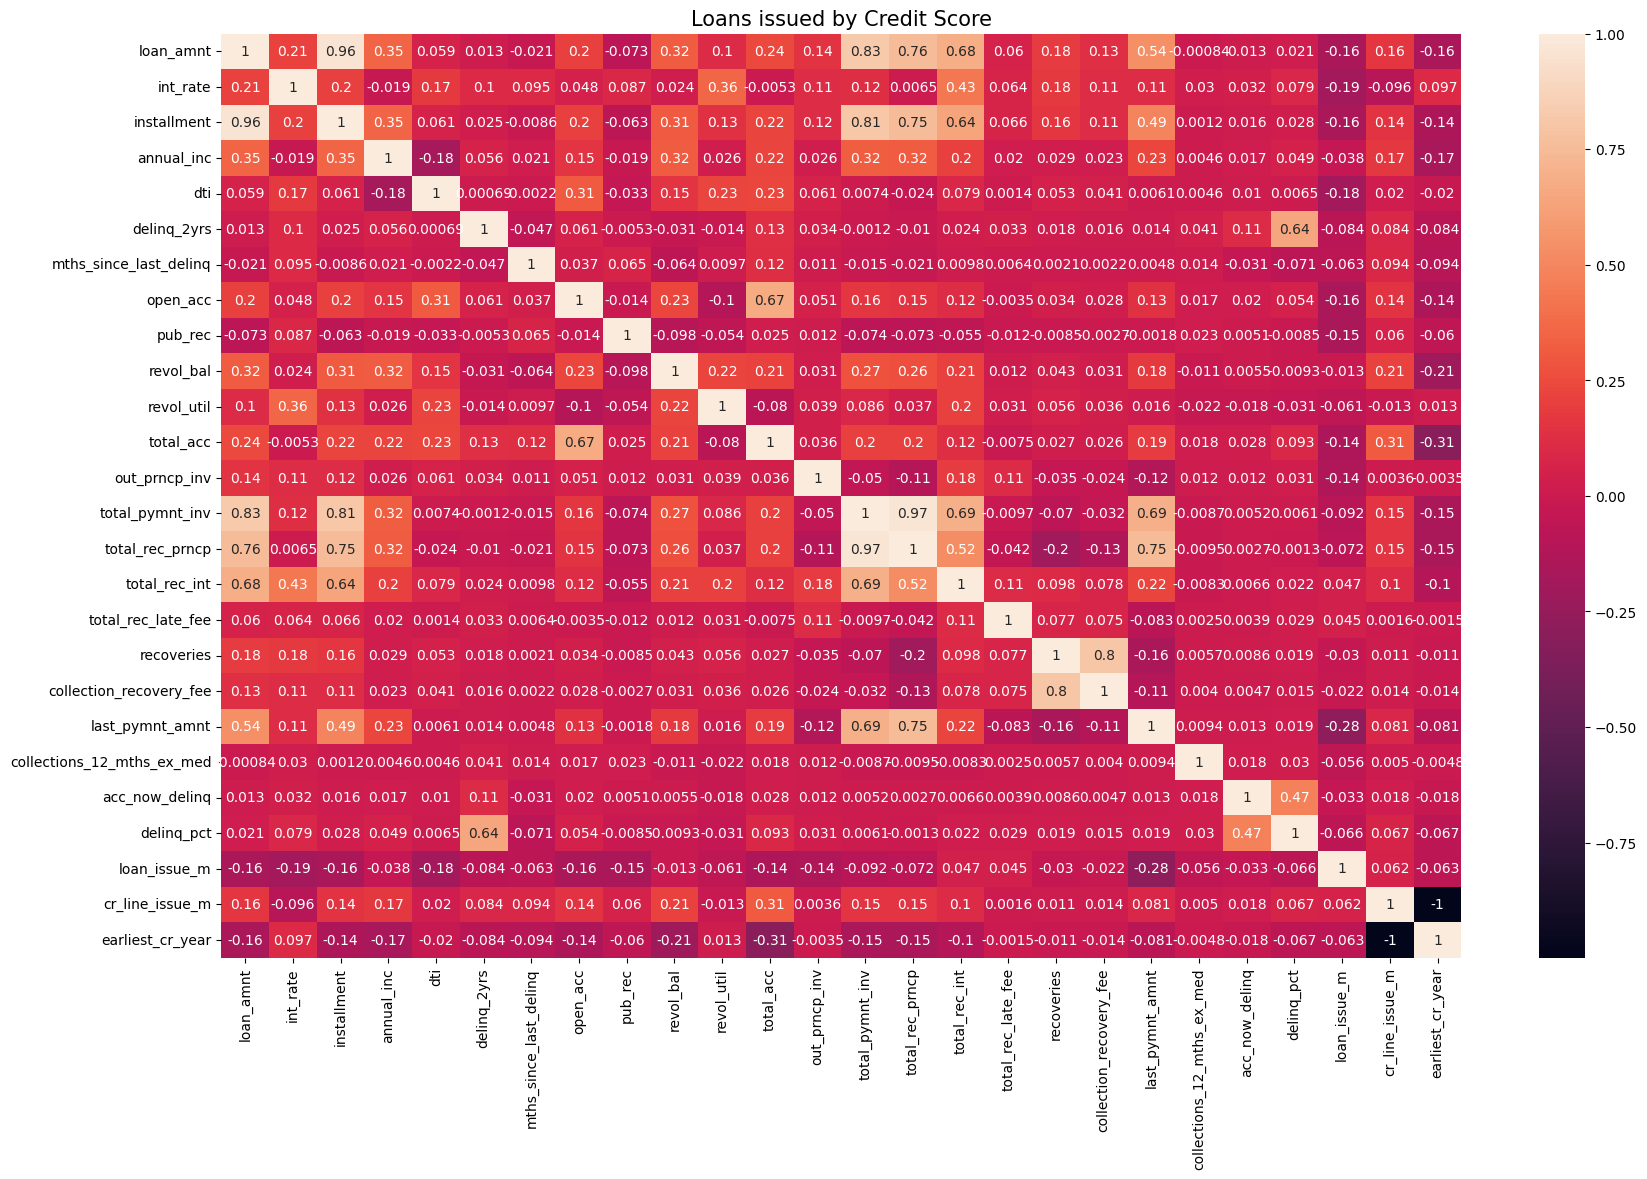

In [117]:
# Biểu đồ ma trận tương quan
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot()
sns.heatmap(data = input[num_col].corr(method = 'pearson'), annot = True)
ax.set_title('Loans issued by Credit Score', fontsize= 15)
pass

- loan_amnt, installment, total_rec_int có tương quan cao nhiều columns khác --> nên loại khỏi mô hình
- total_pymnt_inv, total_rec_int có tương quan cao với nhiều biến khác --> nên loại khỏi mô hình
- Tương tự với collection recovery fee --> nên loại khỏi mô hình

In [118]:
input = input.drop(columns = ['loan_amnt', 'installment', 'total_rec_int',
                              'total_pymnt_inv', 'total_rec_int', 'collection_recovery_fee'])

In [119]:
input_test = input.copy()

In [120]:
output = pd.DataFrame(output)

## Risk Analyse
---

<Axes: xlabel='income_category', ylabel='int_rate'>

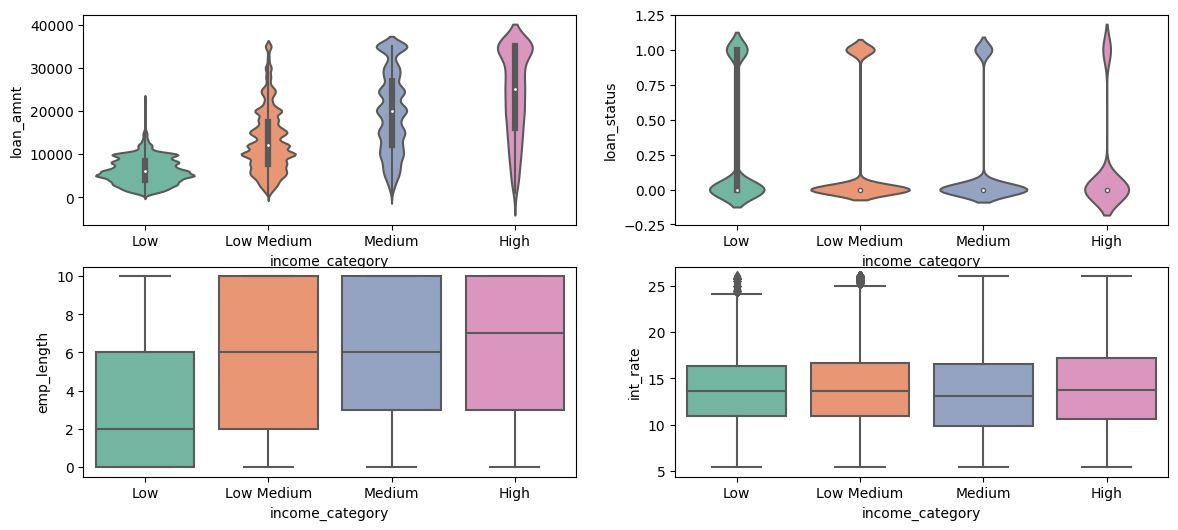

In [121]:
df['income_category'] = np.nan
lst = [df]
df.head()

for col in lst:
    col.loc[col['annual_inc'] <= 30000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 30000) & (col['annual_inc'] <= 100000), 'income_category'] = 'Low Medium'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 3000000), 'income_category'] = 'Medium'
    col.loc[(col['annual_inc'] > 300000) & (col['annual_inc'] <= 7500000), 'income_category'] = 'High'


fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))
sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_status", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax4)

Nhận xét:
- Người ở nhóm thu nhập cao vay mượn nhiều hơn nhóm thu nhập thấp và trung bình thấp
- Người ở nhóm thu nhập cao và thấp dễ có xu hướng trở thành nợ xấu so với 2 nhóm còn lại
- Cũng dễ hiểu khi người đi vay có thu nhập thấp đồng nghĩa với việc thời gian lao động thấp và ngược lại
- Người ở thu nhập thấp có lãi suất lớn hơn nhưng cũng thiếu ổn định hơn so với những người ở nhóm thu nhập cao

In [122]:
df['year'] = pd.to_datetime(df['issue_d']).dt.year

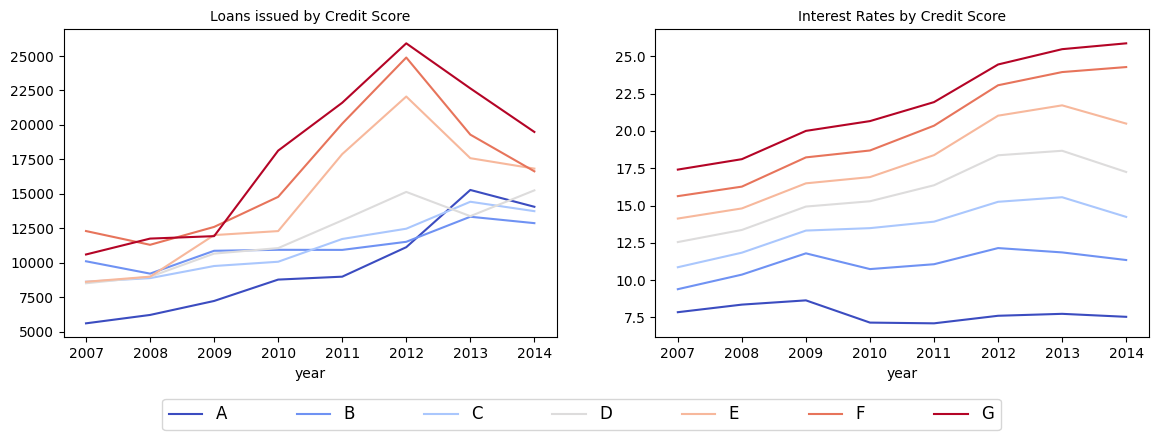

In [123]:
fig, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=10)

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=10)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)


Text(0.5, 1.0, 'Loans status by grade')

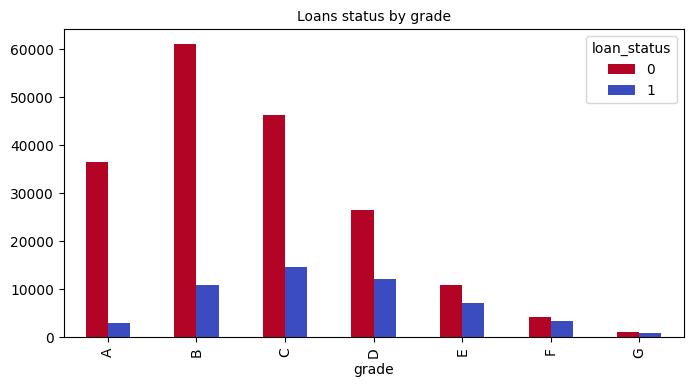

In [124]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

loans_by_grade = df.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked= False, colormap=cmap, ax=ax)
ax.set_title('Loans status by grade', fontsize=10)

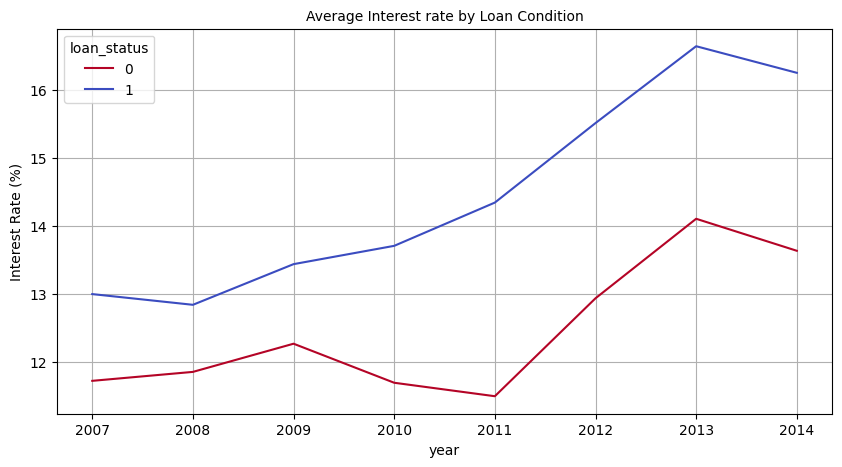

In [51]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

by_int_rate = df.groupby(['year', 'loan_status']).int_rate.mean()
by_int_rate.unstack().plot(ax=ax, colormap=cmap)
ax.set_title('Average Interest rate by Loan Condition', fontsize=10)
ax.set_ylabel('Interest Rate (%)', fontsize=10)

plt.grid()

Nhận xét:
- Người có grade thấp, khoản vay cao và lãi suất cũng cao
- Người có grade cao, lãi suất thấp
- Lãi suất ổn định trong giai đoạn 2007-2011 ở nhóm tín dụng tốt và đối với nhóm nợ xấu, lãi suất tăng trong giai đoạn dài hơn 2008 -2013
- Nhóm B,C,D có khả năng nợ xấu là cao nhất nhưng nhóm B cũng là nhóm có số lượng tín dụng đánh giá là tốt cao nhất

Text(0, 0.5, 'Count')

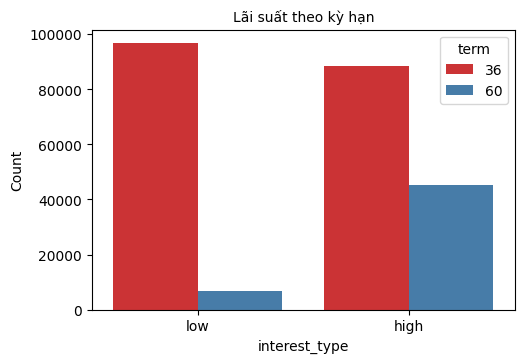

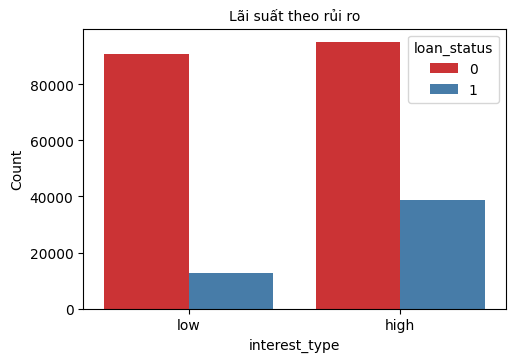

In [52]:
# Giả sử khi lãi suất từ 13% đổ lên thì được coi là nợ xấu
df['interest_type'] = np.nan
lst = [df]
for col in lst:
    col.loc[col['int_rate']< 13, 'interest_type'] = 'low'
    col.loc[col['int_rate']>=13, 'interest_type'] = 'high'

plt.figure(figsize = (12,8))
plt.subplot(221)
ax = sns.countplot(x = 'interest_type', data = df, palette = 'Set1', hue = 'term')
ax.set_title('Lãi suất theo kỳ hạn', fontsize = 10)
ax.set_ylabel('Count', fontsize= 10)


plt.figure(figsize = (12,8))
plt.subplot(222)
ax1 = sns.countplot(x = 'interest_type', data = df,palette = 'Set1', hue = 'loan_status')
ax1.set_title('Lãi suất theo rủi ro', fontsize = 10)
ax1.set_ylabel('Count', fontsize= 10)

- Nhóm có lãi suất cao dễ bị rủi ro hơn nhóm lãi suất thấp
- Nhóm kỳ hạn 60 có rủi ro cao hơn

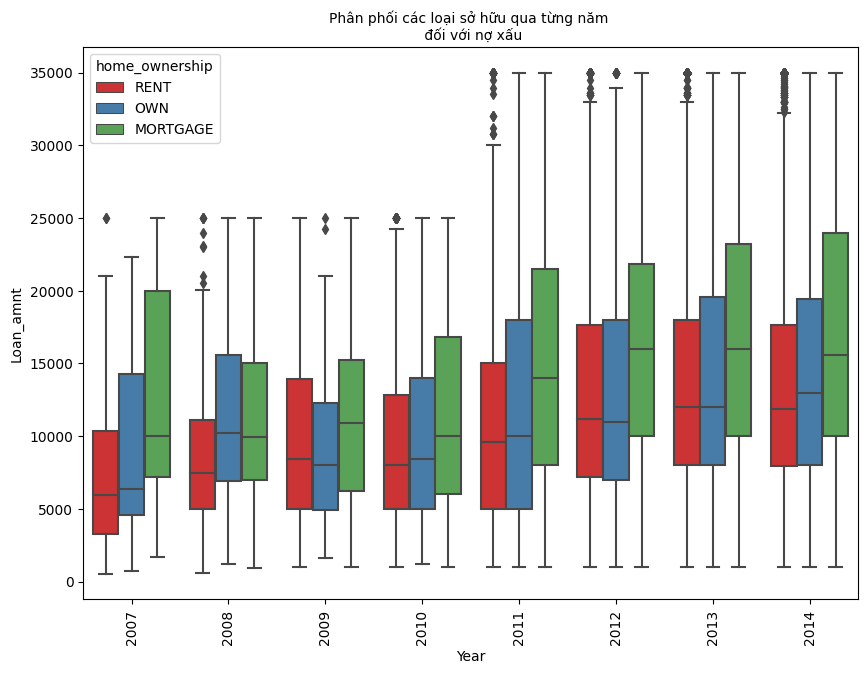

In [53]:
#Risk

bad_loan = df.loc[df['loan_status']==1]

plt.figure(figsize = (10,8))
ax = sns.boxplot(x = 'year', y = 'loan_amnt', hue = 'home_ownership', data = bad_loan, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xlabel('Year', fontsize =10)
ax.set_ylabel('Loan_amnt', fontsize=10)
ax.set_title('Phân phối các loại sở hữu qua từng năm \n đối với nợ xấu', fontsize = 10)

plt.subplots_adjust(hspace = 0.6, top = 0.8)
plt.show()


- Khoản vay thế chấp  có trung vị ổn định hơn qua các năm và có giá trị vay tăng - được xem xét như dễ bị coi là nợ xấu
- Nhóm thuê nhà là nhóm có khả năng nợ xấu thấp nhất nhưng là nhóm có những khoản vay nằm ngoài mức phân vị

### Binning, Weight of Evidence (WoE), Information Value (IV)
---
- Sử dụng WoE nhằm lựa chọn các loại thành phần nên được nhóm
- Sử dụng IV nhằm chọn ra các features tốt nhất cho PD model

In [135]:
# Tính WoE và IV cho biến định danh nominal

def woe_discrete(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    
    df.columns = [df.columns.values[0],'n_obs','prop_bad']
    df['no_bad'] = df['prop_bad'] * df['n_obs']
    df['no_good'] = (1- df['prop_bad']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])

    
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['diff_WoE'] = df['WOE'].diff().abs()
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV_total'] = df['IV'].sum()
    # print('===================== Information value of ' +independent_variable+' is '+ str(round(df['IV'].sum(),3))+' ===================')
    return df

#Tạo hàm tính IV và WoE cho biến có dữ liệu liên tục
def woe_continuous(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    
    df.columns = [df.columns.values[0],'n_obs','prop_bad']
    df['no_bad'] = df['prop_bad'] * df['n_obs']
    df['no_good'] = (1- df['prop_bad']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])

    df = df.sort_values(independent_variable) ## 
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV_total'] = df['IV'].sum()
    #print('===================== Information value of ' +independent_variable+' is '+ str(round(df['IV'].sum(),3))+' ===================')
    return df

# Vẽ plot
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WOE']
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

In [126]:
df.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_pct,loan_issue_m,cr_line_issue_m,earliest_cr_year,income_category,year
0,1077501,5000,36,10.650,162.870,B,10,RENT,24000.000,Verified,2011-12-01,0,credit_card,27.650,0.000,1985-01-01,1.000,0.000,3.000,0.000,13648,83.700,9.000,f,0.000,5831.780,5000.000,861.070,0.000,0.000,0.000,2015-01-01,171.620,2016-01-01,0.000,1,0.000,0.000,48.000,371.000,1985,Low,2011
1,1077430,2500,60,15.270,59.830,C,0,RENT,30000.000,Source Verified,2011-12-01,1,car,1.000,0.000,1999-04-01,5.000,0.000,3.000,0.000,1687,9.400,4.000,f,0.000,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,1,0.000,0.000,48.000,201.000,1999,Low,2011
2,1077175,2400,36,15.960,84.330,C,10,RENT,12252.000,Not Verified,2011-12-01,0,small_business,8.720,0.000,2001-11-01,2.000,0.000,2.000,0.000,2956,98.500,10.000,f,0.000,3003.650,2400.000,603.650,0.000,0.000,0.000,2014-06-01,649.910,2016-01-01,0.000,1,0.000,0.000,48.000,169.000,2001,Low,2011
3,1076863,10000,36,13.490,339.310,C,10,RENT,49200.000,Source Verified,2011-12-01,0,other,20.000,0.000,1996-02-01,1.000,35.000,10.000,0.000,5598,21.000,37.000,f,0.000,12226.300,10000.000,2209.330,16.970,0.000,0.000,2015-01-01,357.480,2015-01-01,0.000,1,0.000,0.000,48.000,238.000,1996,Low Medium,2011
4,1075269,5000,36,7.900,156.460,A,3,RENT,36000.000,Source Verified,2011-12-01,0,wedding,11.200,0.000,2004-11-01,3.000,0.000,9.000,0.000,7963,28.300,12.000,f,0.000,5631.380,5000.000,631.380,0.000,0.000,0.000,2015-01-01,161.030,2015-09-01,0.000,1,0.000,0.000,48.000,133.000,2004,Low Medium,2011


In [127]:
input_discrete = ['term','grade','emp_length','home_ownership',
                  'verification_status','purpose','initial_list_status',]
len(input_discrete)

7

In [134]:
input_continuous = ['int_rate','annual_inc','dti', 'delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec',
                    'revol_bal','revol_util','total_acc','out_prncp_inv','total_rec_prncp','total_rec_late_fee', 'recoveries',
                    'last_pymnt_amnt','delinq_pct','loan_issue_m','cr_line_issue_m','earliest_cr_year','acc_now_delinq',
                    'collections_12_mths_ex_med']
len(input_continuous)

22

In [140]:
input_test = input.copy()

In [130]:
# Tính toán WoE và IV của dữ liệu discrete
for i in range(0, len(input_discrete)):
    print(woe_discrete(input_test, input_discrete[i], output))

   term   n_obs  prop_bad    no_bad    no_good  Final_good  Final_bad    WOE  \
0    60   52193     0.353 18447.000  33746.000       0.181      0.358 -0.679   
1    36  185452     0.179 33126.000 152326.000       0.819      0.642  0.243   

   diff_WoE    IV  IV_total  
0       NaN 0.120     0.163  
1     0.922 0.043     0.163  
  grade  n_obs  prop_bad    no_bad   no_good  Final_good  Final_bad    WOE  \
0     G   1960     0.472   926.000  1034.000       0.006      0.018 -1.173   
1     F   7291     0.443  3231.000  4060.000       0.022      0.063 -1.055   
2     E  17925     0.392  7029.000 10896.000       0.059      0.136 -0.845   
3     D  38449     0.311 11973.000 26476.000       0.142      0.232 -0.490   
4     C  60753     0.240 14598.000 46155.000       0.248      0.283 -0.132   
5     B  71951     0.151 10900.000 61051.000       0.328      0.211  0.440   
6     A  39316     0.074  2916.000 36400.000       0.196      0.057  1.241   

   diff_WoE    IV  IV_total  
0       NaN 0.

- emp_length có information gain thấp nên loại ra khỏi mô hình

In [131]:
input = input.drop(columns = ['emp_length','initial_list_status'])

In [141]:
for i in range(0, len(input_continuous)):
    input_test[input_continuous[i]] = pd.cut(input_test[input_continuous[i]], bins = 10)
    print(woe_continuous(input_test, input_continuous[i], output))

           int_rate  n_obs  prop_bad    no_bad   no_good  Final_good  \
0    (5.399, 7.484]  14105     0.049   693.000 13412.000       0.072   
1    (7.484, 9.548]  27447     0.092  2518.000 24929.000       0.134   
2   (9.548, 11.612]  31727     0.134  4239.000 27488.000       0.148   
3  (11.612, 13.676]  47087     0.181  8514.000 38573.000       0.207   
4   (13.676, 15.74]  43218     0.235 10147.000 33071.000       0.178   
5   (15.74, 17.804]  31738     0.292  9273.000 22465.000       0.121   
6  (17.804, 19.868]  20262     0.336  6811.000 13451.000       0.072   
7  (19.868, 21.932]  10079     0.389  3916.000  6163.000       0.033   
8  (21.932, 23.996]   7627     0.439  3350.000  4277.000       0.023   
9   (23.996, 26.06]   4355     0.485  2112.000  2243.000       0.012   

   Final_bad    WOE    IV  IV_total  
0      0.013  1.680 0.099     0.408  
1      0.049  1.009 0.086     0.408  
2      0.082  0.586 0.038     0.408  
3      0.165  0.228 0.010     0.408  
4      0.197 -0.1

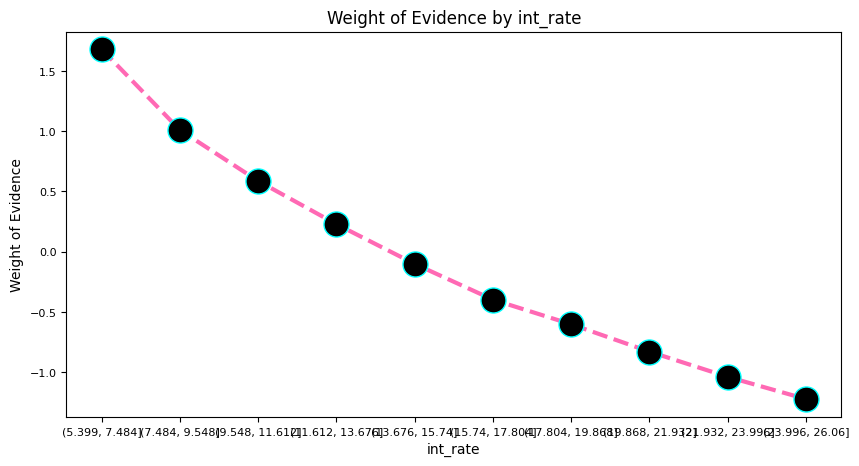

None


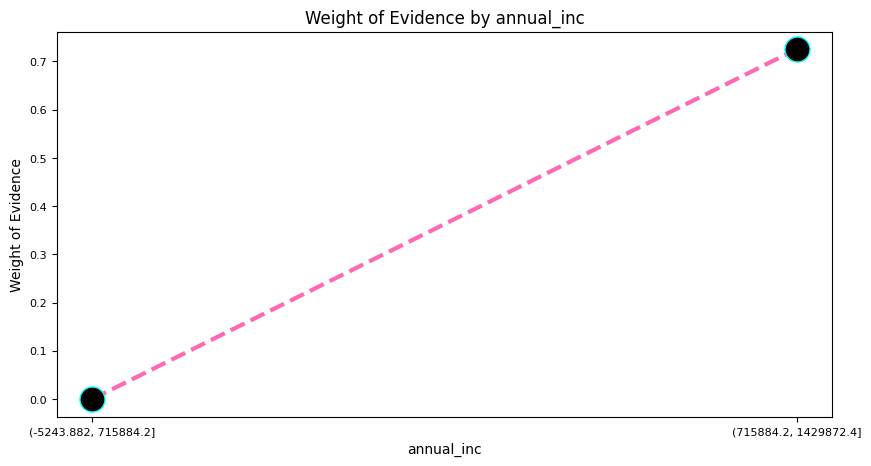

None


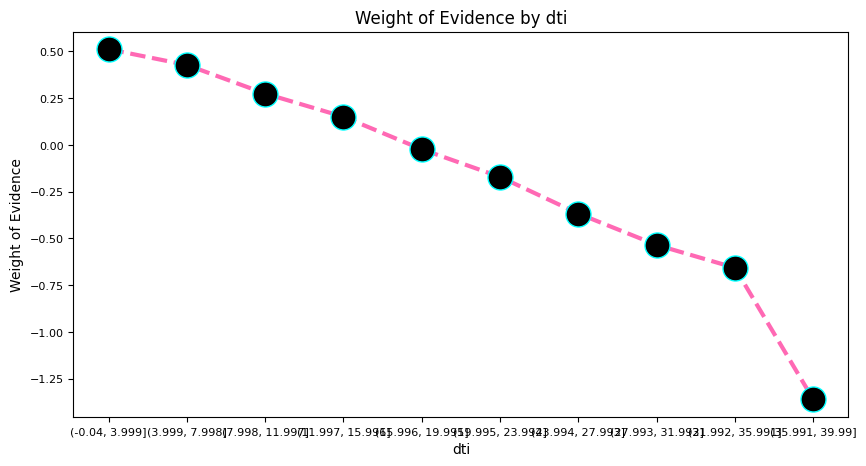

None


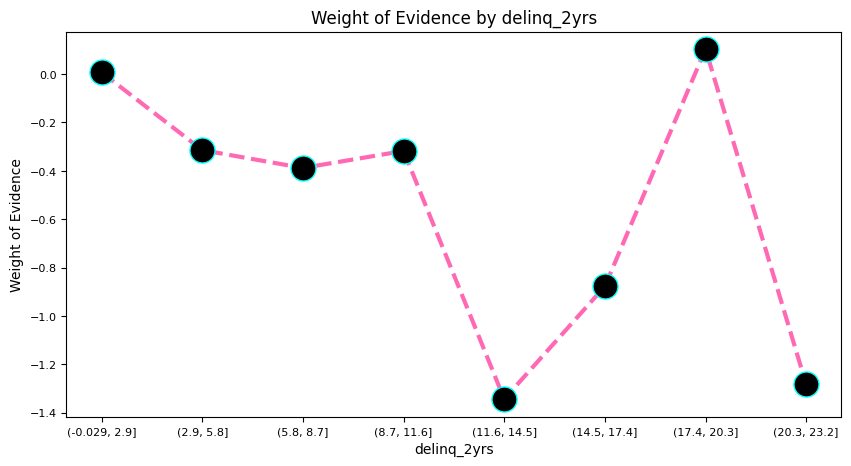

None


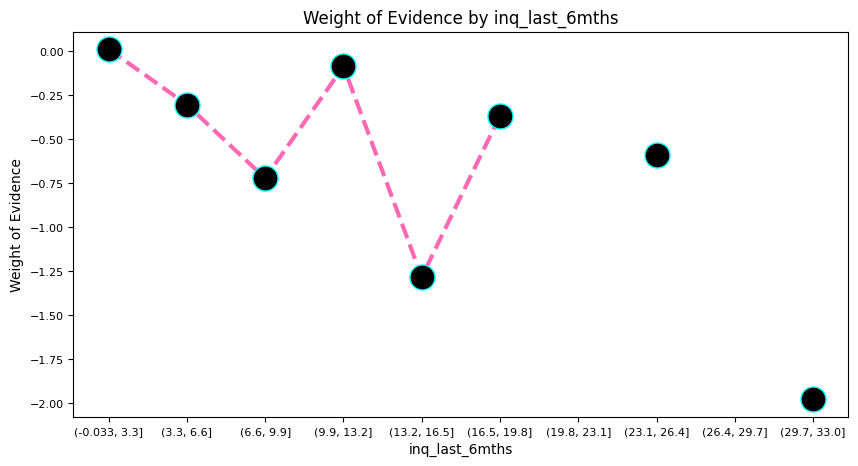

None


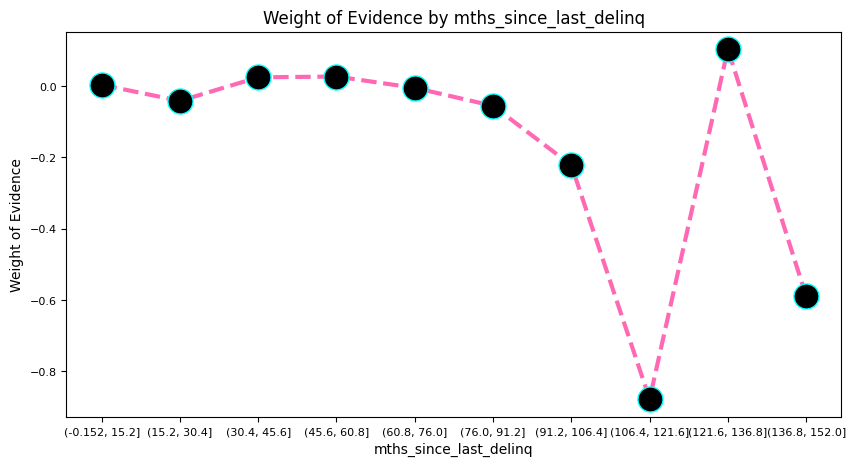

None


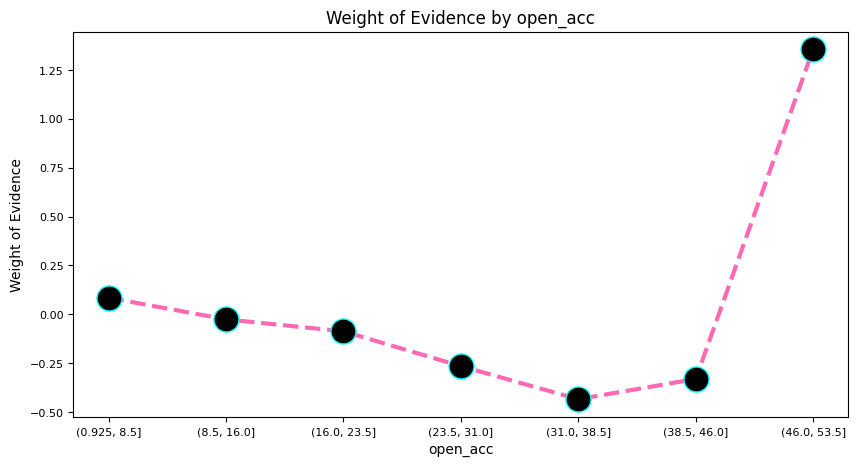

None


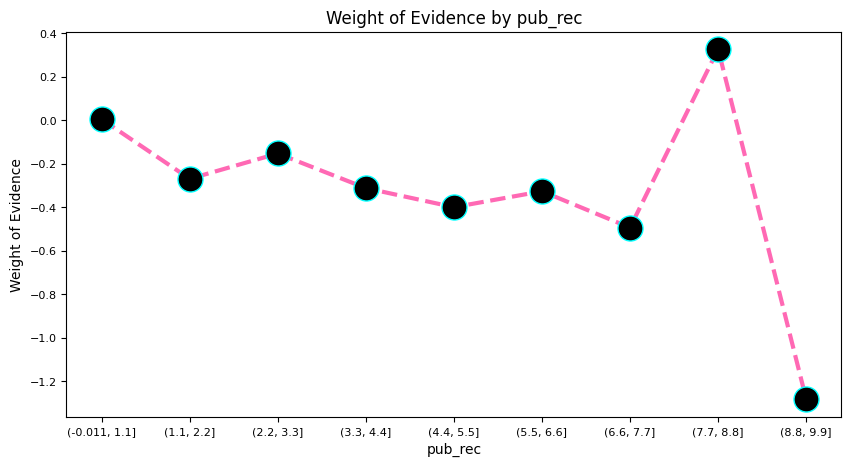

None


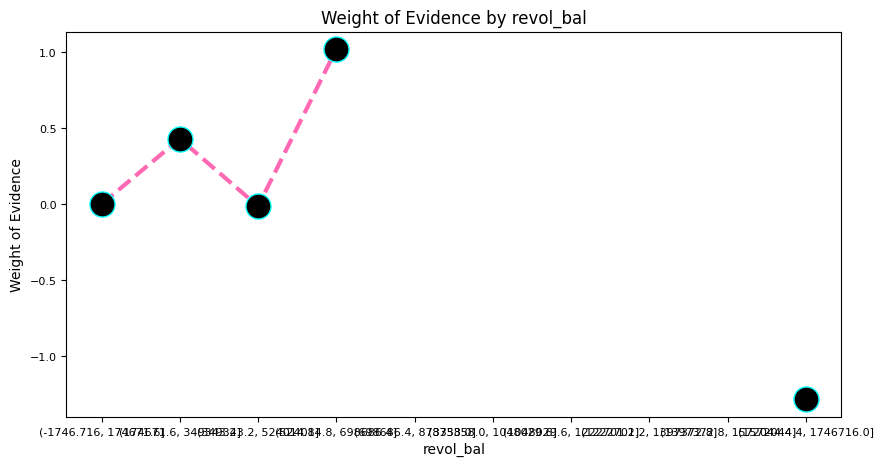

None


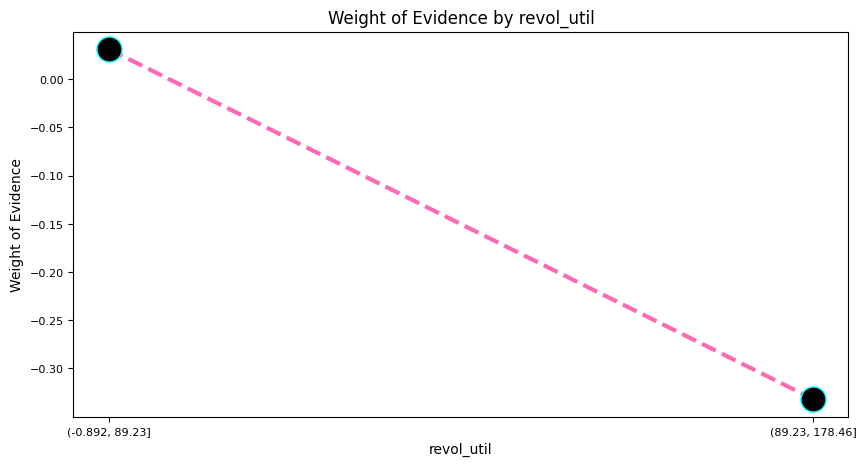

None


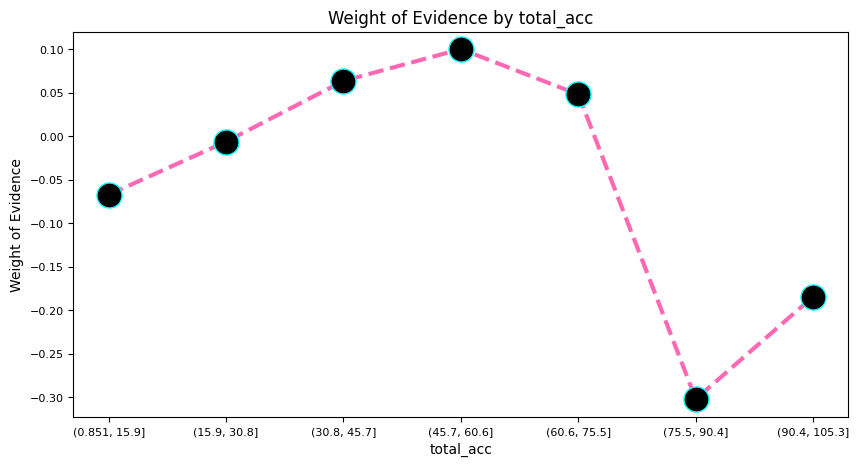

None


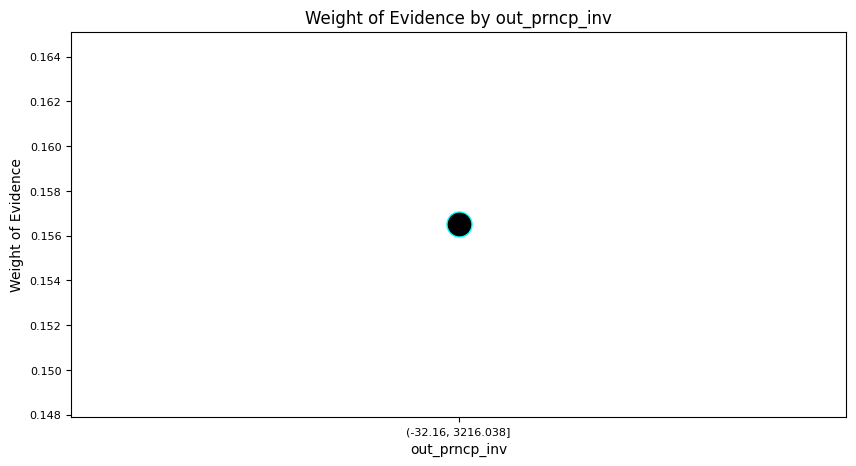

None


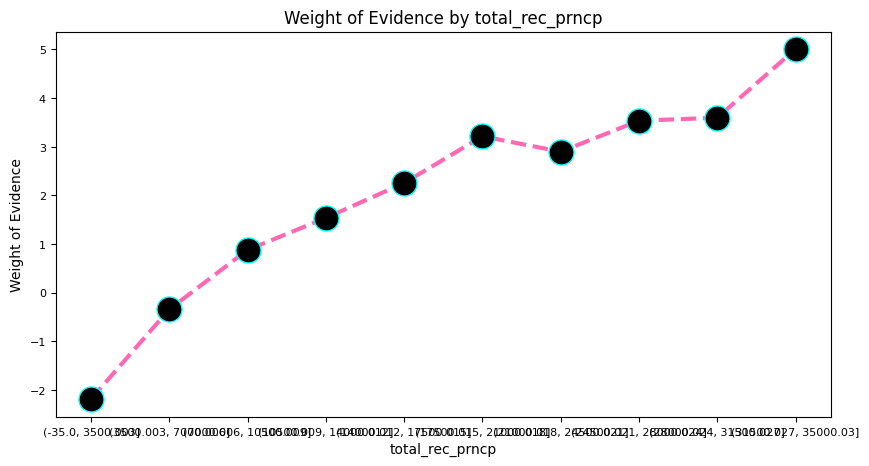

None


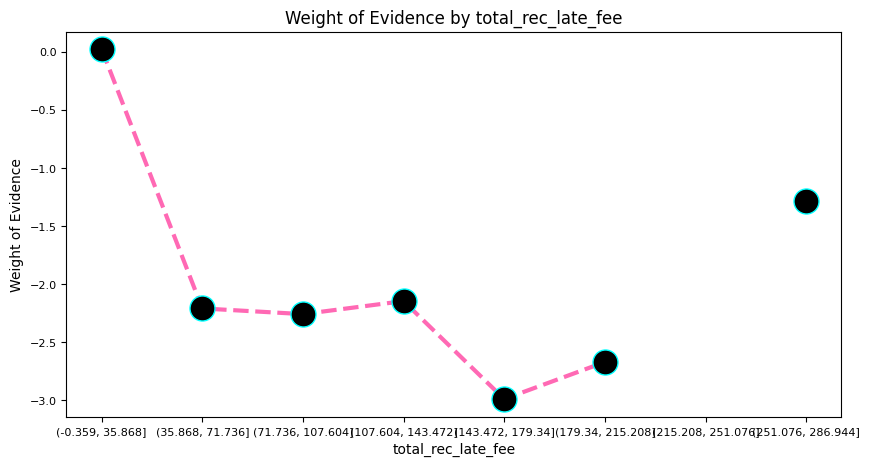

None


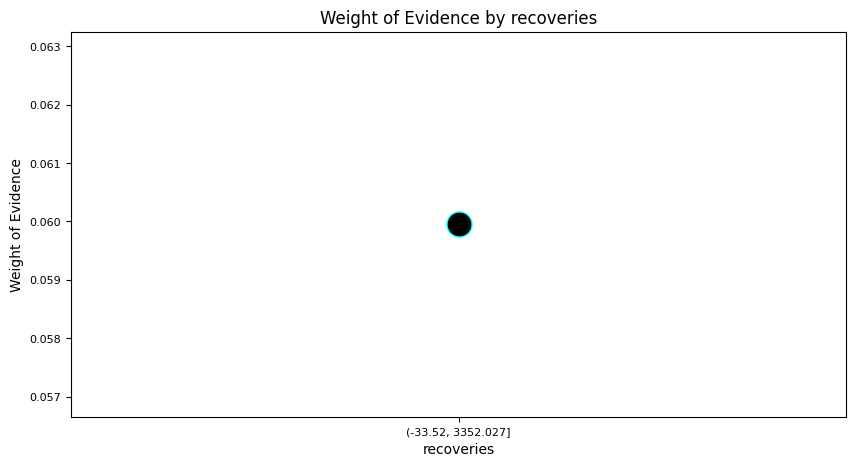

None


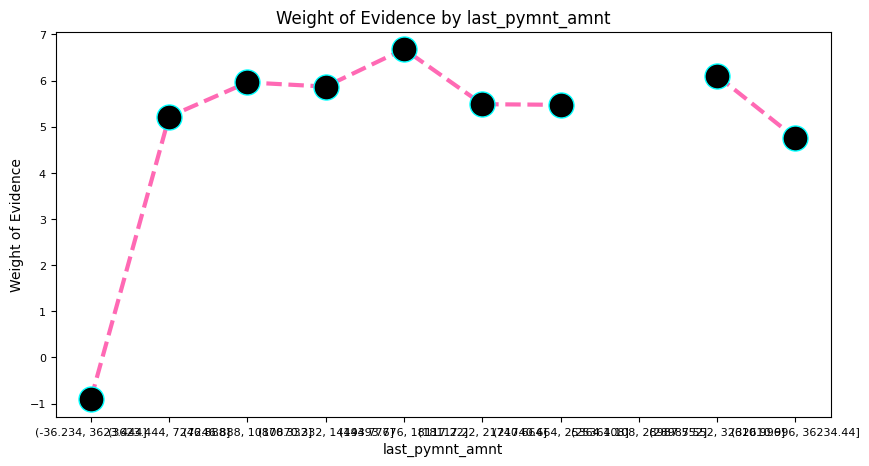

None


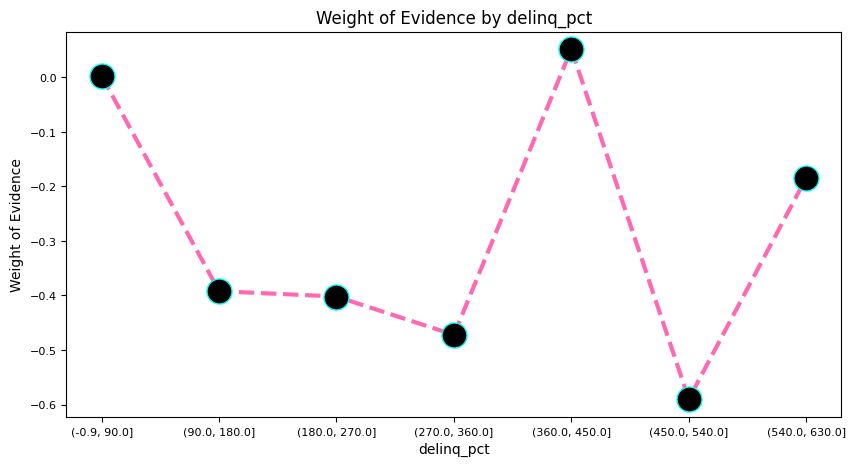

None


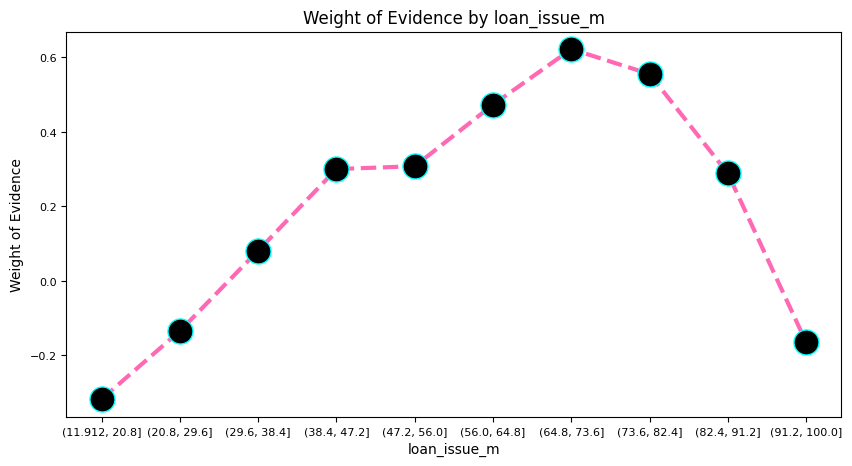

None


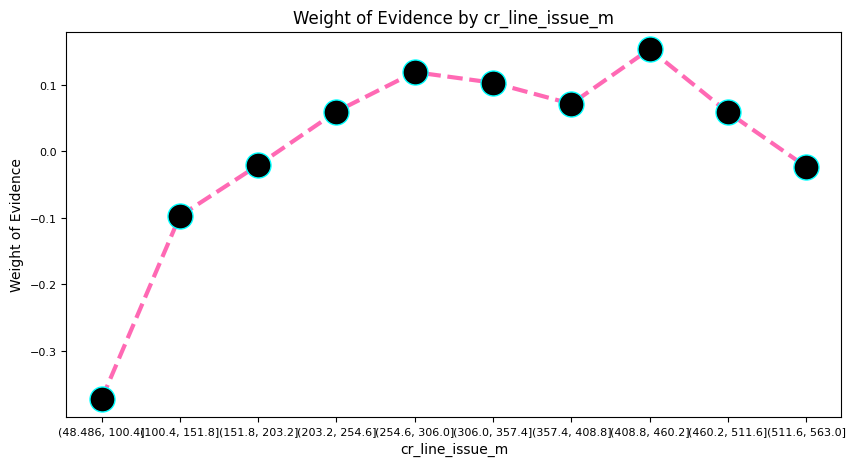

None


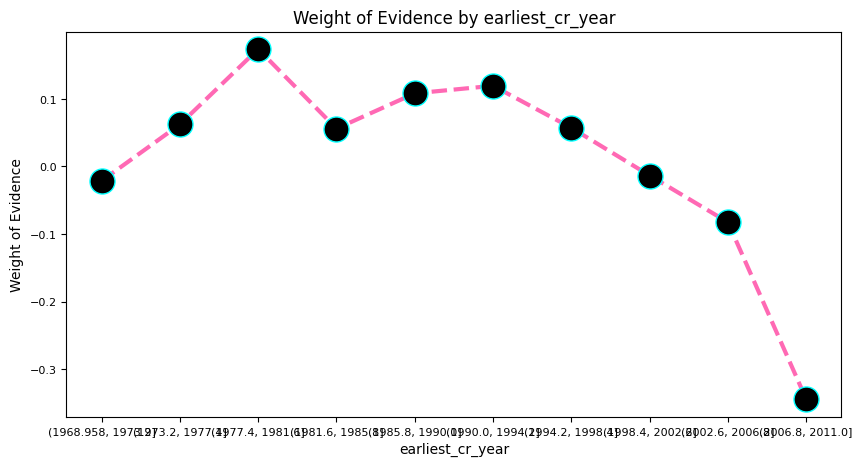

None


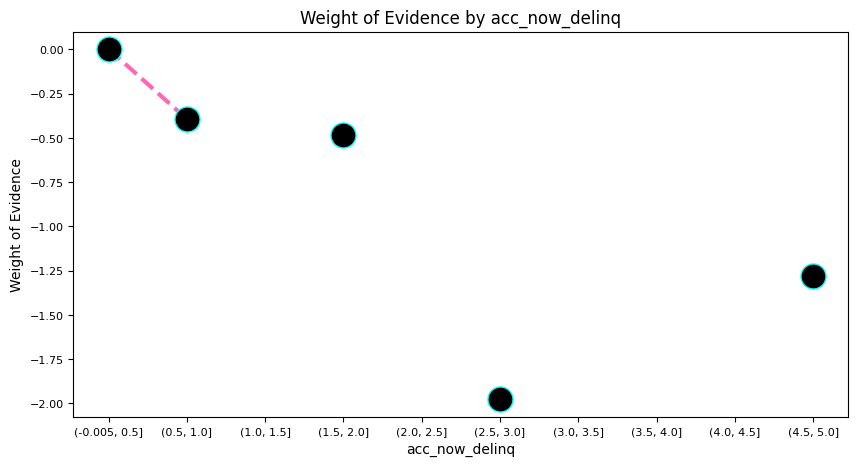

None


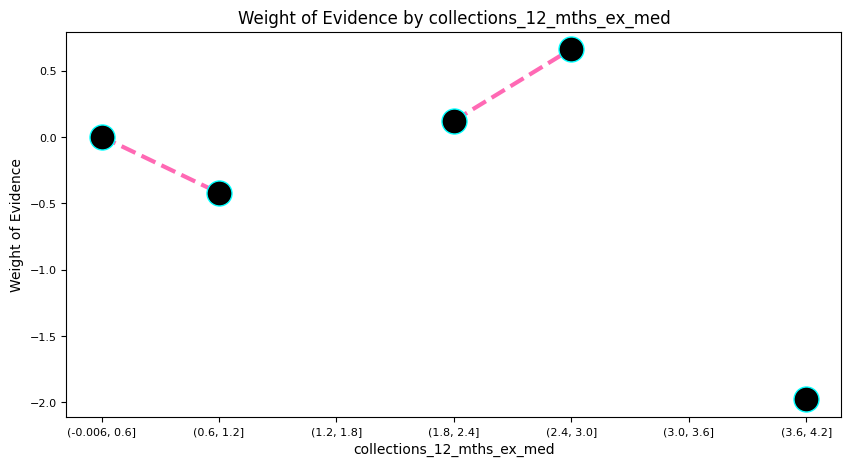

None


In [142]:
for i in range(0, len(input_continuous)):
    print(plot_by_woe(woe_continuous(input_test, input_continuous[i], output)))

Từ bảng trên, lựa chọn các bins phù hợp:
- Annual Income: sẽ chia làm 3 bins:         <=30000 , (30000, 100000], (100000, 300000], >=300000
- delinq_2yrs : chia làm 2 bins:               delinq = 1 và 0 và delinq >1
- inq_last_6mths:: chia làm 2 bins:            inq = 0 và >0
- mths_since_last_delinq: chia làm 2 bins:      mths =0 và mths >0
- open_acc: chia làm 5 bins: (2,3,4),(5,6,7), (8,9,10), (10, 14), >=14
- loại pub_rec, revol_bal, earliest_cr_year khỏi mô hình
- revol_util: chia làm 3 bins: <= 5, (5,20), >=20

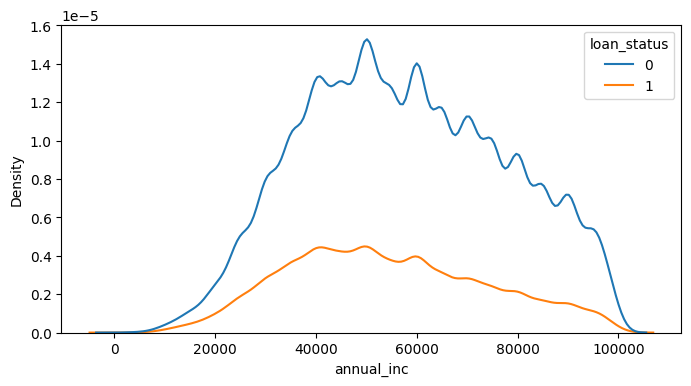

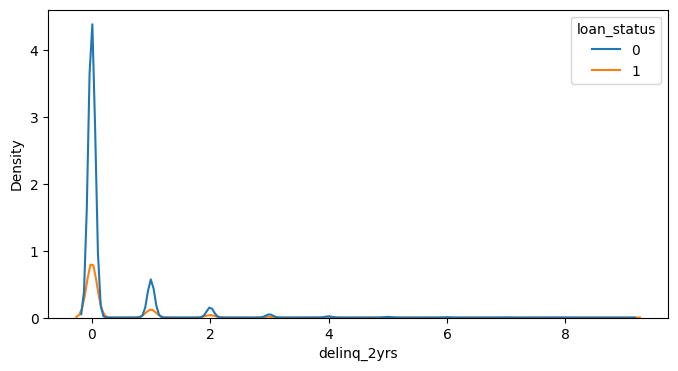

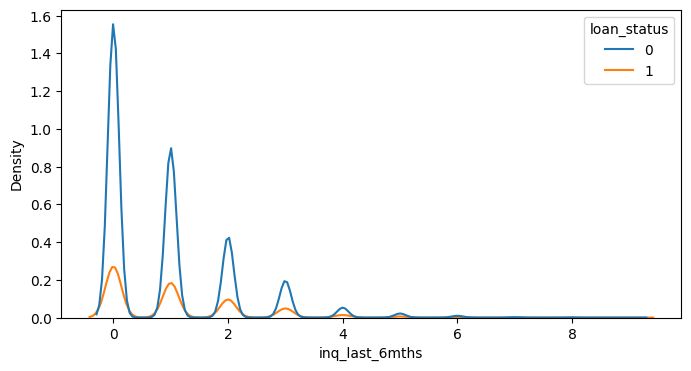

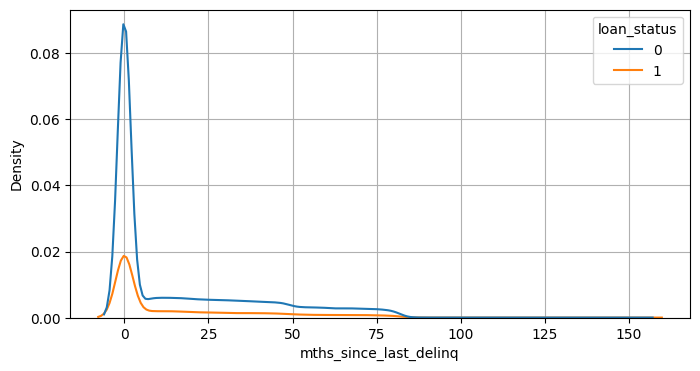

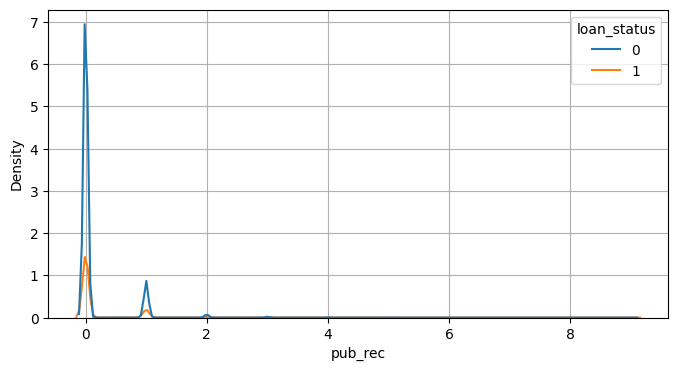

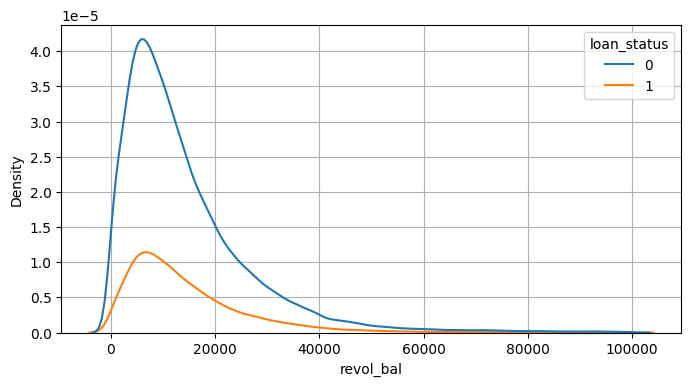

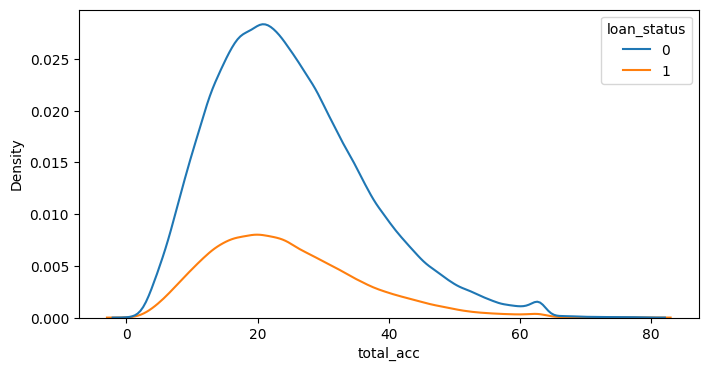

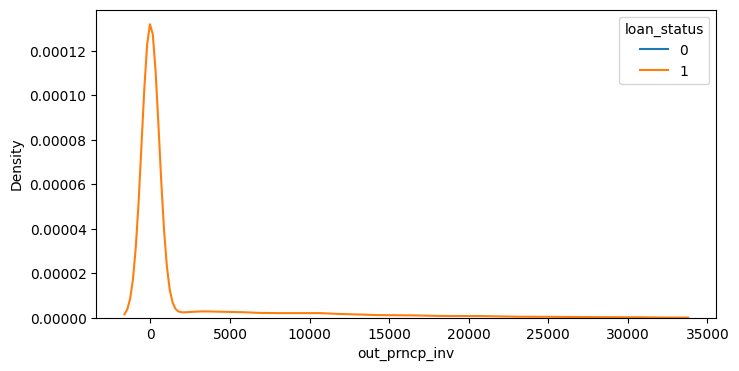

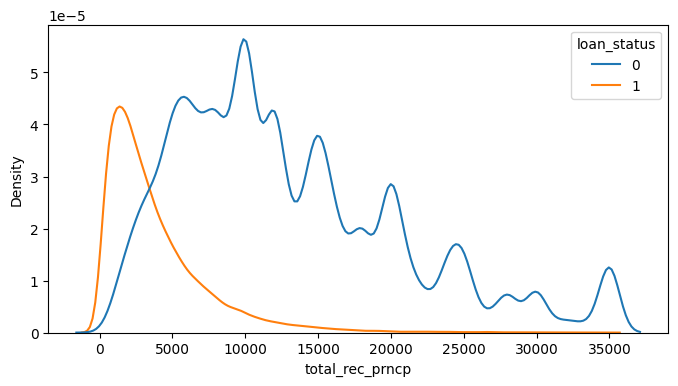

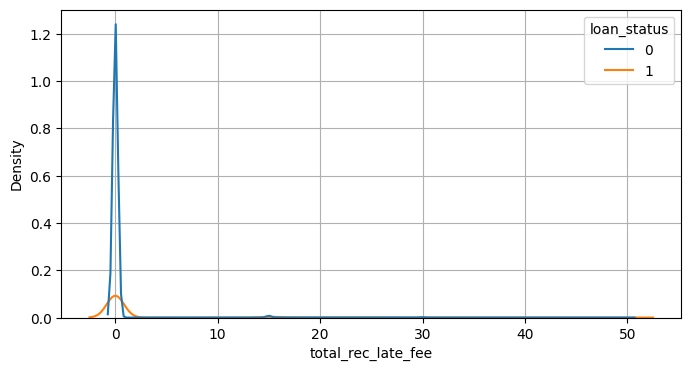

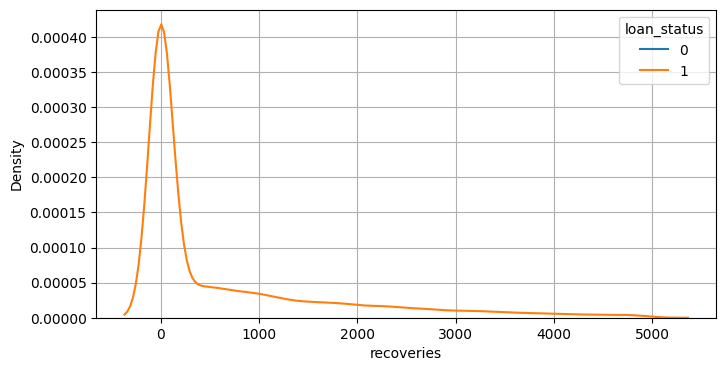

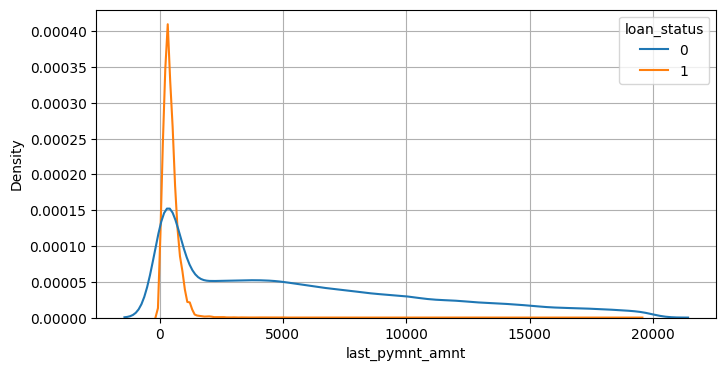

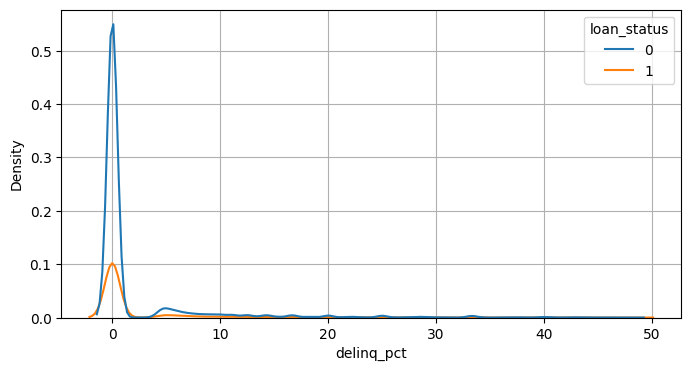

In [143]:
# Plot Histogram
plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['annual_inc']< 100000], x ='annual_inc', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['delinq_2yrs']<10], x ='delinq_2yrs', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['inq_last_6mths']< 10], x ='inq_last_6mths', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df, x ='mths_since_last_delinq', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['pub_rec']< 10], x ='pub_rec', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['revol_bal']<100000], x ='revol_bal', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['total_acc']<80], x ='total_acc', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df, x ='out_prncp_inv', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df, x ='total_rec_prncp', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['total_rec_late_fee']<50], x ='total_rec_late_fee', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['recoveries']<5000], x ='recoveries', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['last_pymnt_amnt']<20000], x ='last_pymnt_amnt', hue ='loan_status')

plt.figure(figsize = (8,4))
sns.kdeplot(data = df[df['delinq_pct']<50], x ='delinq_pct', hue ='loan_status')

pass

In [144]:
input = input.drop(columns = ['pub_rec', 'revol_bal', 'earliest_cr_year'])

In [145]:
input_continuous.remove('pub_rec')
input_continuous.remove('revol_bal')
input_continuous.remove('earliest_cr_year')
input_continuous.remove('mths_since_last_delinq')
input_continuous.remove('revol_util')
input_continuous.remove('total_acc')
input_continuous.remove('recoveries')
input_continuous.remove('last_pymnt_amnt')
input_continuous.remove('collections_12_mths_ex_med')
input_continuous.remove('acc_now_delinq')

In [147]:
# Bining lại dữ liệu
input['int_rate'] = pd.cut(input['int_rate'], bins = 10)
input['annual_inc'] = pd.cut(input['annual_inc'], bins = [1895, 30000, 100000, 300000, 7500000])
input['dti']  = pd.cut(input['dti'], bins = 10 )
input['delinq_2yrs'] = pd.cut(input['delinq_2yrs'], bins = [-0.029, 1, 29])
input['inq_last_6mths'] =pd.cut(input['inq_last_6mths'], bins = [-0.033,0.9, 33])
input['open_acc'] =pd.cut(input['open_acc'], bins = [0.925, 23.5, 46, 76]) 
input['out_prncp_inv'] =pd.cut(input['out_prncp_inv'], bins= [-32.16, 0, 32160.38])
input['total_rec_prncp'] = pd.cut(input['total_rec_prncp'], bins = [-35.0, 5000,  7000.006, 10500.009, 14000.012, 17500.015, 31500.027,35000.03])
input['total_rec_late_fee'] = pd.cut(input['total_rec_late_fee'], bins = [-0.1, 35.868, 358.68 ])
input['delinq_pct'] = pd.cut(input['delinq_pct'], bins= [-0.1, 90, 360, 900])
input['loan_issue_m'] = pd.cut(input['loan_issue_m'], bins = [-0.1,15,17,20,30,80,100])
input['cr_line_issue_m'] = pd.cut(input['cr_line_issue_m'], bins= [48, 125,250,400, 563.0])


In [149]:
for i in range(0, len(input_continuous)):
    print(woe_continuous(input, input_continuous[i], output))

           int_rate  n_obs  prop_bad    no_bad   no_good  Final_good  \
0    (5.399, 7.484]  14105     0.049   693.000 13412.000       0.072   
1    (7.484, 9.548]  27447     0.092  2518.000 24929.000       0.134   
2   (9.548, 11.612]  31727     0.134  4239.000 27488.000       0.148   
3  (11.612, 13.676]  47087     0.181  8514.000 38573.000       0.207   
4   (13.676, 15.74]  43218     0.235 10147.000 33071.000       0.178   
5   (15.74, 17.804]  31738     0.292  9273.000 22465.000       0.121   
6  (17.804, 19.868]  20262     0.336  6811.000 13451.000       0.072   
7  (19.868, 21.932]  10079     0.389  3916.000  6163.000       0.033   
8  (21.932, 23.996]   7627     0.439  3350.000  4277.000       0.023   
9   (23.996, 26.06]   4355     0.485  2112.000  2243.000       0.012   

   Final_bad    WOE    IV  IV_total  
0      0.013  1.680 0.099     0.408  
1      0.049  1.009 0.086     0.408  
2      0.082  0.586 0.038     0.408  
3      0.165  0.228 0.010     0.408  
4      0.197 -0.1

Bỏ những biến có IV lớn hơn 0.5 và nhỏ hơn 0.02:
- open_acc
- delinq_2yrs
- inq_last_6mths
- delinq_pct
- cr_line_issue_m
- total_rec_prncp
- pub_rec
- revol_bal
- earliest_cr_year
- mths_since_last_delinq
- revol_util
- total_acc
- recoveries
- last_pymnt_amnt
- collections_12_mths_ex_med
- acc_now_delinq
- out_prncp_inv 

In [151]:
input = input.drop(columns = ['delinq_2yrs','mths_since_last_delinq','open_acc', 'revol_util','total_acc', 'total_rec_prncp','recoveries',
                              'last_pymnt_amnt', 'cr_line_issue_m','acc_now_delinq', 'collections_12_mths_ex_med','delinq_pct','inq_last_6mths','out_prncp_inv'])

In [152]:
input = input.drop(columns = ['earliest_cr_line', 'issue_d','last_pymnt_d','last_credit_pull_d'])

In [153]:
input.head()

,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,total_rec_late_fee,loan_issue_m
0,36,"(9.548, 11.612]",B,RENT,"(1895, 30000]",Verified,credit_card,"(23.994, 27.993]","(-0.1, 35.868]","(30.0, 80.0]"
1,60,"(13.676, 15.74]",C,RENT,"(1895, 30000]",Source Verified,car,"(-0.04, 3.999]","(-0.1, 35.868]","(30.0, 80.0]"
2,36,"(15.74, 17.804]",C,RENT,"(1895, 30000]",Not Verified,small_business,"(7.998, 11.997]","(-0.1, 35.868]","(30.0, 80.0]"
3,36,"(11.612, 13.676]",C,RENT,"(30000, 100000]",Source Verified,other,"(19.995, 23.994]","(-0.1, 35.868]","(30.0, 80.0]"
4,36,"(7.484, 9.548]",A,RENT,"(30000, 100000]",Source Verified,wedding,"(7.998, 11.997]","(-0.1, 35.868]","(30.0, 80.0]"


In [164]:
input['term'] =input['term'].replace(60, '60')
input['term'] =input['term'].replace(30, '30')

In [155]:
input_onehot= pd.get_dummies(input)
input_onehot.head()

,term_36,term_60,"int_rate_(5.399, 7.484]","int_rate_(7.484, 9.548]","int_rate_(9.548, 11.612]","int_rate_(11.612, 13.676]","int_rate_(13.676, 15.74]","int_rate_(15.74, 17.804]","int_rate_(17.804, 19.868]","int_rate_(19.868, 21.932]","int_rate_(21.932, 23.996]","int_rate_(23.996, 26.06]",grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,"annual_inc_(1895, 30000]","annual_inc_(30000, 100000]","annual_inc_(100000, 300000]","annual_inc_(300000, 7500000]",verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,"dti_(-0.04, 3.999]","dti_(3.999, 7.998]","dti_(7.998, 11.997]","dti_(11.997, 15.996]","dti_(15.996, 19.995]","dti_(19.995, 23.994]","dti_(23.994, 27.993]","dti_(27.993, 31.992]","dti_(31.992, 35.991]","dti_(35.991, 39.99]","total_rec_late_fee_(-0.1, 35.868]","total_rec_late_fee_(35.868, 358.68]","loan_issue_m_(-0.1, 15.0]","loan_issue_m_(15.0, 17.0]","loan_issue_m_(17.0, 20.0]","loan_issue_m_(20.0, 30.0]","loan_issue_m_(30.0, 80.0]","loan_issue_m_(80.0, 100.0]"
0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [157]:
# Loại những dummies trong cùng nhóm có WoE nhỏ nhất để tránh dummies trap
input_onehot = input_onehot.drop(columns = ['term_36','grade_C','home_ownership_OWN', 'verification_status_Source Verified',
                                            'purpose_house', 'int_rate_(11.612, 13.676]','annual_inc_(30000, 100000]',
                                            'dti_(15.996, 19.995]','total_rec_late_fee_(-0.1, 35.868]','loan_issue_m_(20.0, 30.0]'])


In [158]:
frame = pd.concat([input_onehot, output], axis = 1)

In [165]:
input_t = input.copy()

In [169]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
input_t['grade'] = label_encoder.fit_transform(input_t['grade'])
input_t['home_ownership'] = label_encoder.fit_transform(input_t['home_ownership'])
input_t['purpose'] = label_encoder.fit_transform(input_t['purpose'])
input_t['int_rate'] = label_encoder.fit_transform(input_t['int_rate'])
input_t['verification_status'] = label_encoder.fit_transform(input_t['verification_status'])
input_t['annual_inc'] = label_encoder.fit_transform(input_t['annual_inc'])
input_t['dti'] = label_encoder.fit_transform(input_t['dti'])
input_t['total_rec_late_fee'] = label_encoder.fit_transform(input_t['total_rec_late_fee'])
input_t['loan_issue_m'] = label_encoder.fit_transform(input_t['loan_issue_m'])

In [171]:
input_t = pd.concat([input_t, output], axis = 1)

In [172]:
frame.to_csv('E:\learn st new\Credit score\loan_models.csv', index= False)
input_t.to_csv('E:\learn st new\Credit score\loan_RF_model.csv', index= False)